# Natural Language Processing with nltk

### Inspecionando um dataset com avaliações de Filmes

In [2]:
#Importando a biblioteca
import nltk

In [3]:
#Acessando o dataset, através de um download da propria lib
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/leandro/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

Este dataset contem 2000 arquivos:
* 1000 positive reviews in the pos/folder
* 1000 negative reviews in the neg/folder
* Uma média de 800 palavras por review

_A biblioteca inclui muitos outros datasets, parar todos eles:_
<br>
nltk.download()
<br>

### nltk corpora
___Corpus___ (plural de corpora [EN]) _é uma coleção de textos digitais, montada para processamento de textos.<br>
Nltk fornecce uma interface de download para pré-processamento de datasets de textos._

Uma vez que fizemos o download do dataset (movies_reviews), este foi adicionado a pasta corpus dentro da lib, teremos então que importa-lo ao notebook

In [5]:
from nltk.corpus import movie_reviews

_O metodo ___fileids___ faz com que, todos os datasets contidos em nltk.corpus, possam ser acessados como uma lista contendo todos os arquivos disponíveis._

___Alguns metodos comuns ao se trabalhar com listas, também podem ser utilizados neste dataset___ 

In [11]:
#movie_reviews.fileids()
movie_reviews.fileids()[:5]
#movie_reviews.fileids()[-5:]

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt']

In [12]:
#Filtrando os reviews em negativos e positivos
negative_fileids = movie_reviews.fileids('neg')
positive_fileids = movie_reviews.fileids('pos')

In [13]:
len(negative_fileids), len(positive_fileids)

(1000, 1000)

_Podemos inspecionar um dos reviews usando o metodo ___raw___ do movie_reviews, cada arquivo esta dividido em sentenças, os curadores do dataset, removeram de cada critica, qualquer menção ao filme_

In [17]:
print(movie_reviews.raw(fileids=positive_fileids[0]))

films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . 
for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen . 
to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . 
the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . 
in other words , don't dismiss this film because of its source . 
if you can get past the whole comic book thing , you might find another stumbling block in from hell's directors , albert and allen hughes . 
getting the hughes brothers to direct this seems almost as 

## Tokenization

Ao analizar um texto um dos primeiros passos é dividi-lo, ou seja Tokenization, isto pode ser feito levando em conta alguns aspectos do texto:
* Pontuação
* Abreviações
* Palavras com hifens
<br><br>
_A lib nltk auxilia muito no processo de tolkenization, como por exemplo:_

### Tolkenize Text in Words

In [18]:
#Exemplo
romeo_text = """Why then, O brawling love! O loving hate!
O any thing, of nothing first create!
O heavy lightness, serious vanity,
Misshapen chaos of well-seeming forms,
Feather of lead, bright smoke, cold fire, sick health,
Still-waking sleep, that is not what it is!
This love feel I, that feel no love in this."""

In [21]:
#Tentando separar o texto da forma padrão
romeo_text.split()

['Why',
 'then,',
 'O',
 'brawling',
 'love!',
 'O',
 'loving',
 'hate!',
 'O',
 'any',
 'thing,',
 'of',
 'nothing',
 'first',
 'create!',
 'O',
 'heavy',
 'lightness,',
 'serious',
 'vanity,',
 'Misshapen',
 'chaos',
 'of',
 'well-seeming',
 'forms,',
 'Feather',
 'of',
 'lead,',
 'bright',
 'smoke,',
 'cold',
 'fire,',
 'sick',
 'health,',
 'Still-waking',
 'sleep,',
 'that',
 'is',
 'not',
 'what',
 'it',
 'is!',
 'This',
 'love',
 'feel',
 'I,',
 'that',
 'feel',
 'no',
 'love',
 'in',
 'this.']

_Neste caso palavras com hifen foram mantidas juntas, e pontuações como "!" também._

O metodo __nltk.word_tokenize__ divide o texto por palavras, pontuações ou alguma marcação que seja passada como argumento, este é um algoritmo de ML nao supervisionado próprio da biblioteca nltk.<br>
O conjunto __punkt__ trata-se de um arquivo pré-treinado com pontuações e abreviações (Em inglês), que melhora o desempenho do algoritmo de tokenize. Também é possível utilizar o punk para aprender com algum outro conjunto de texto para usa-lo em previsões futuras.

In [22]:
#Download do conjunto treinado punkt
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/leandro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

_Desta forma podemos utilizar esta word_tokenize para tokenizar nosso texto_

In [27]:
romeo_words = nltk.word_tokenize(romeo_text)

In [28]:
romeo_words

['Why',
 'then',
 ',',
 'O',
 'brawling',
 'love',
 '!',
 'O',
 'loving',
 'hate',
 '!',
 'O',
 'any',
 'thing',
 ',',
 'of',
 'nothing',
 'first',
 'create',
 '!',
 'O',
 'heavy',
 'lightness',
 ',',
 'serious',
 'vanity',
 ',',
 'Misshapen',
 'chaos',
 'of',
 'well-seeming',
 'forms',
 ',',
 'Feather',
 'of',
 'lead',
 ',',
 'bright',
 'smoke',
 ',',
 'cold',
 'fire',
 ',',
 'sick',
 'health',
 ',',
 'Still-waking',
 'sleep',
 ',',
 'that',
 'is',
 'not',
 'what',
 'it',
 'is',
 '!',
 'This',
 'love',
 'feel',
 'I',
 ',',
 'that',
 'feel',
 'no',
 'love',
 'in',
 'this',
 '.']

___O dataset movie_reviews do corpus já esta tokenizado e pronto para ser acessado com o metodo "words"___

In [29]:
movie_reviews.words(fileids=positive_fileids[0])

['films', 'adapted', 'from', 'comic', 'books', 'have', ...]

## Build a Bag-of-Words Model

___Bag-of-words___ é uma representação simples do "corpo" de um texto; uma coleção de palavras como um texto desordenado

Uma maneira de criar features com palavras é através de uma matriz:<br>
Cada palavra representa uma coluna e cada "corpo do texto" (review) uma linha com valores boleanos, onde cada celula é marcada com True or False se a palavra aparecer naquele review.
<img src="IMG_20191016_165331.jpg">

As features criadas com as palavras podem ser usadas com classificadores.<br>
_Neste exemplo, cada palavra será uma feature_

In [30]:
{word:True for word in romeo_words}

{'Why': True,
 'then': True,
 ',': True,
 'O': True,
 'brawling': True,
 'love': True,
 '!': True,
 'loving': True,
 'hate': True,
 'any': True,
 'thing': True,
 'of': True,
 'nothing': True,
 'first': True,
 'create': True,
 'heavy': True,
 'lightness': True,
 'serious': True,
 'vanity': True,
 'Misshapen': True,
 'chaos': True,
 'well-seeming': True,
 'forms': True,
 'Feather': True,
 'lead': True,
 'bright': True,
 'smoke': True,
 'cold': True,
 'fire': True,
 'sick': True,
 'health': True,
 'Still-waking': True,
 'sleep': True,
 'that': True,
 'is': True,
 'not': True,
 'what': True,
 'it': True,
 'This': True,
 'feel': True,
 'I': True,
 'no': True,
 'in': True,
 'this': True,
 '.': True}

In [32]:
#O underscore(_) refere-se ao dicionario anteriormente criado, como nao foi atribuido nenhuma variavél 
#que o contenha, por padrão utiliza-se o (_)
type(_)

dict

In [33]:
#Criando a bag-of-words
#Definindo uma função que irá conter as palavras que serão utilizadas como features
def build_bag_of_words_features(words):
    return {word:True for word in words}

In [34]:
build_bag_of_words_features(romeo_words)

{'Why': True,
 'then': True,
 ',': True,
 'O': True,
 'brawling': True,
 'love': True,
 '!': True,
 'loving': True,
 'hate': True,
 'any': True,
 'thing': True,
 'of': True,
 'nothing': True,
 'first': True,
 'create': True,
 'heavy': True,
 'lightness': True,
 'serious': True,
 'vanity': True,
 'Misshapen': True,
 'chaos': True,
 'well-seeming': True,
 'forms': True,
 'Feather': True,
 'lead': True,
 'bright': True,
 'smoke': True,
 'cold': True,
 'fire': True,
 'sick': True,
 'health': True,
 'Still-waking': True,
 'sleep': True,
 'that': True,
 'is': True,
 'not': True,
 'what': True,
 'it': True,
 'This': True,
 'feel': True,
 'I': True,
 'no': True,
 'in': True,
 'this': True,
 '.': True}

Ainda há um problema de que os simbolos de pontuação foram assinalados com True, e também algumas preposições e palavras de conexão de frases nao são interessantes para features.<br>
Tais palavras são chamadas de __stopwords__ e a lib nltk possui um _corpus_ delas(em inglês).

In [35]:
#Fazendo o download das stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/leandro/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
#Biblioteca para removermos a pontuação(EN) das features
import string

In [39]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
#Removendo as stopwords e pontuações
useless_words = nltk.corpus.stopwords.words("english") + list(string.punctuation)
#useless_words

In [67]:
#Update built_bag_of_words_features
def build_bag_of_words_features_filtered(words):
    return{word:1 for word in words \
          if not word in useless_words}

In [68]:
build_bag_of_words_features_filtered(romeo_words)

{'Why': 1,
 'O': 1,
 'brawling': 1,
 'love': 1,
 'loving': 1,
 'hate': 1,
 'thing': 1,
 'nothing': 1,
 'first': 1,
 'create': 1,
 'heavy': 1,
 'lightness': 1,
 'serious': 1,
 'vanity': 1,
 'Misshapen': 1,
 'chaos': 1,
 'well-seeming': 1,
 'forms': 1,
 'Feather': 1,
 'lead': 1,
 'bright': 1,
 'smoke': 1,
 'cold': 1,
 'fire': 1,
 'sick': 1,
 'health': 1,
 'Still-waking': 1,
 'sleep': 1,
 'This': 1,
 'feel': 1,
 'I': 1}

# Analyze a frequencie of words in dataset

Aqui iremos utilizar a classe __Counter__, nativa do python; fornecendo uma lista de palavras para um objeto desta classe ele retorna um outro objeto no qual podemos encontrar a frequencia das palavras desejadas

## Plotting Frequencies of Words

In [69]:
#utilizando o data set movie_review
all_words = movie_reviews.words()
len(all_words)/1e6

1.58382

_Inicialmente iremos remover do dataset as palavras indesejadas que definimos anteriormente_

In [70]:
filtered_words = [word for word in movie_reviews.words() if not word in useless_words]

In [71]:
type(filtered_words)

list

In [72]:
len(filtered_words)/1e6

0.710579

_Quase metade da lista anterior - all_words_

In [73]:
#Contando
from collections import Counter

In [74]:
word_counter = Counter(filtered_words)

In [75]:
#Verificando as palavras mais comuns
most_common_words = word_counter.most_common()[:10]
most_common_words

[('film', 9517),
 ('one', 5852),
 ('movie', 5771),
 ('like', 3690),
 ('even', 2565),
 ('good', 2411),
 ('time', 2411),
 ('story', 2169),
 ('would', 2109),
 ('much', 2049)]

___Plotting___

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0.5, 0, 'Word Rank')

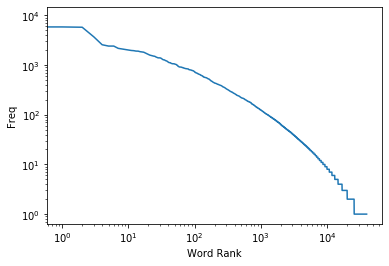

In [77]:
#Plot com escala logaritmica para reduzir a escala do eixo X, que é da ordem de 1e6
sorted_word_counts = sorted(list(word_counter.values()), reverse=True)

plt.loglog(sorted_word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

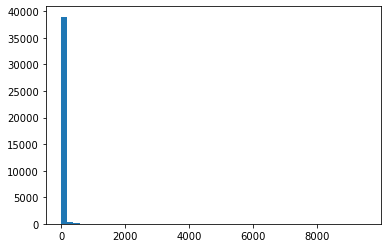

In [78]:
#Outra maneira de representar a frequencia das palavras é com um histograma
plt.hist(sorted_word_counts, bins=50);

_Muitas palavras aparecem poucas vezes no dataset_<br>
Uma forma de melhorar a vizualização neste cenario é normalizando os valores, ou seja, passando para a escala logaritmica

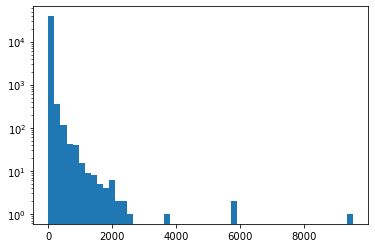

In [79]:
plt.hist(sorted_word_counts, bins=50, log=True);

# Sentiment Analysis

Este termo refere-se a detectar emoção e/ou atitude em um texto. Isto pode ser implementado através de um algoritmo de machine learning de classificação.

_Inicialmente precisamos implementar uma função para criar um conjunto de features, o que ja fizemos.<br>
Em seguida criamos features que representem reviews positivos/negativos para cada review.<br>
Utilizaremos o algoritmo de classificação Naive Bayes, no qual este algoritmo, recapitulando, analise uma abordagem probabilistica para classificação, isto significa que as relações entre as features de input e as classes de labels são expressas como uma probabilidade, então dada uma feature como input teremos a probabilidade de cada classe ser estimada, a classe com mais alta probabilidade é determinada como label da amostra._

## Train a Classifier for Sentiment Analysis

Usando a bag-of-words criada anteriormente, podemos construir, separadamente, features para reviews positivos e para reviews negativos. Basicamente para cada 1000 reviews negativos e 1000 reviews positivos, criaremos um dicionario com as palavras e associaremos uma label "neg" e "pos" para elas.

In [84]:
#Features negativas
negative_features = [
    (build_bag_of_words_features_filtered(movie_reviews.words(fileids=[f])), 'neg') \
    for f in negative_fileids
]

In [86]:
#print(negative_features[3])

In [87]:
#Features positivas
positive_features = [
    (build_bag_of_words_features_filtered(movie_reviews.words(fileids=[f])), 'pos') \
    for f in positive_fileids
]

In [89]:
#print(positive_features[6])

_Importando o modelo a ser utilizado, Naive Bayes, lembrando que este modelo foi estudado, e está contido, na biblioteca scikit-learn_

In [90]:
from nltk.classify import NaiveBayesClassifier

In [92]:
#Separando 80% do data set para treino para obter uma boa estatistica
split = 800

#Treinando o modelo com 80% dos dados
sentiment_classifier = NaiveBayesClassifier.train(positive_features[:split]+negative_features[:split])

___Verificando a acuracia do modelo___

In [94]:
nltk.classify.util.accuracy(sentiment_classifier, positive_features[:split]+negative_features[:split])

0.980625

Tal acuracia, tão alta, era esperada pois o modelo apenas "viu" o conjunto de treino (os 80%) e testamos a acuracia com o mesmo conjunto. E com os 20% que o modelo nunca "viu"?

In [95]:
nltk.classify.util.accuracy(sentiment_classifier, positive_features[split:]+negative_features[split:])

0.7175

_Diminuiu um pouco mas ainda assim é um bom valor, levando em conta que a capacidade humano de acurácia é em média de 80%_

___Quais features dos nossos reviews são mais significativas para a acuracia?___

In [97]:
sentiment_classifier.show_most_informative_features()

Most Informative Features
             outstanding = 1                 pos : neg    =     13.9 : 1.0
               insulting = 1                 neg : pos    =     13.7 : 1.0
              vulnerable = 1                 pos : neg    =     13.0 : 1.0
               ludicrous = 1                 neg : pos    =     12.6 : 1.0
             uninvolving = 1                 neg : pos    =     12.3 : 1.0
                  avoids = 1                 pos : neg    =     11.7 : 1.0
              astounding = 1                 pos : neg    =     11.7 : 1.0
             fascination = 1                 pos : neg    =     11.0 : 1.0
               affecting = 1                 pos : neg    =     10.3 : 1.0
                  seagal = 1                 neg : pos    =     10.3 : 1.0
